In [2]:
!pip install xgboost


  Using cached xgboost-3.0.4-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.4-py3-none-win_amd64.whl (56.8 MB)


In [5]:
!pip install lightgbm


  Using cached lightgbm-4.6.0-py3-none-win_amd64.whl.metadata (17 kB)
Using cached lightgbm-4.6.0-py3-none-win_amd64.whl (1.5 MB)


In [7]:
!pip install shap


  Using cached shap-0.48.0-cp312-cp312-win_amd64.whl.metadata (25 kB)
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 545.3/545.3 kB 3.6 MB/s eta 0:00:00


In [20]:
!pip install tensorflow



Dataset Shape: (32581, 11)

Columns: ['person_age', 'person_income', 'person_home_ownership', 'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt', 'loan_status', 'loan_percent_income', 'cb_person_default_on_file', 'cb_person_cred_hist_length']

Data Types:
 person_age                    float64
person_income                 float64
person_home_ownership         float64
person_emp_length             float64
loan_intent                   float64
loan_grade                    float64
loan_amnt                     float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file     float64
cb_person_cred_hist_length    float64
dtype: object

Missing Values:
 person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_status                   0
loan_percent_income      

C:\Users\PRATHAM S\AppData\Local\Temp\ipykernel_1156\1230576159.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['loan_status'], palette="coolwarm")


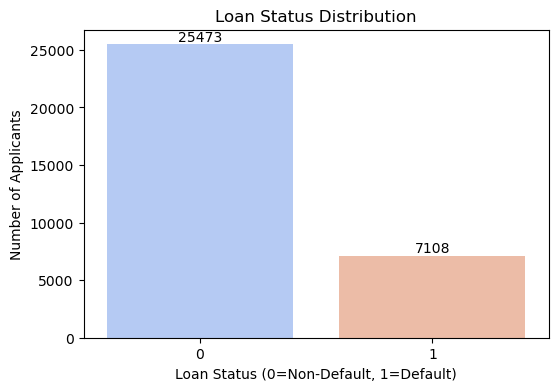

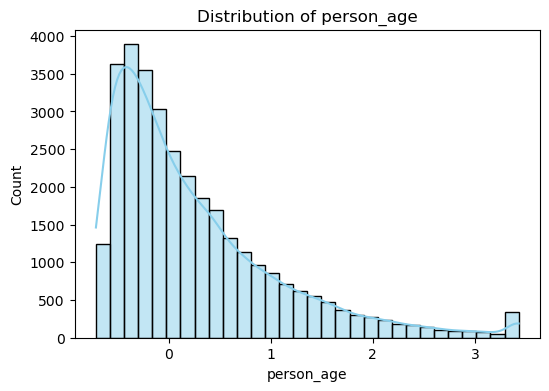

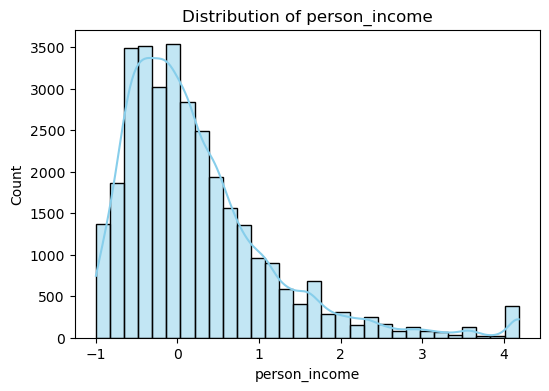

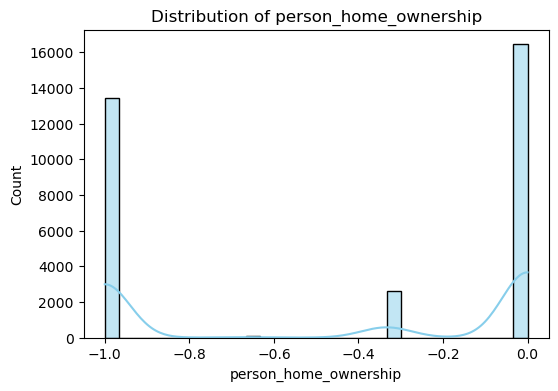

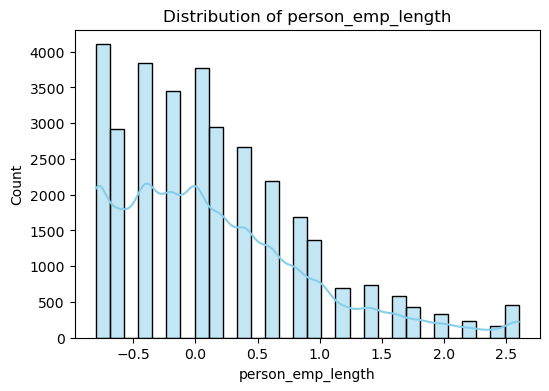

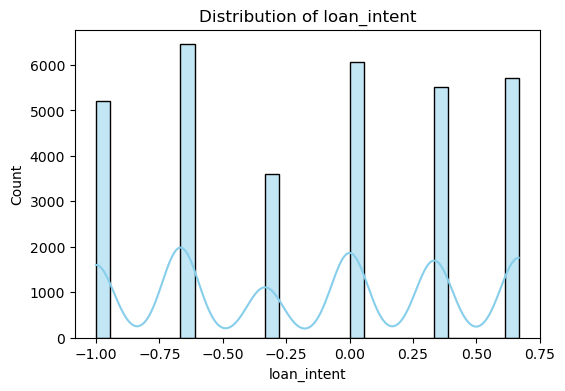

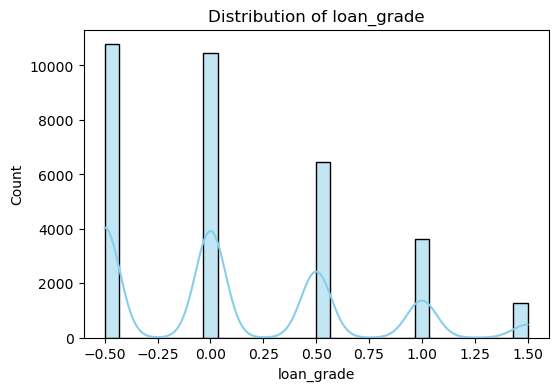

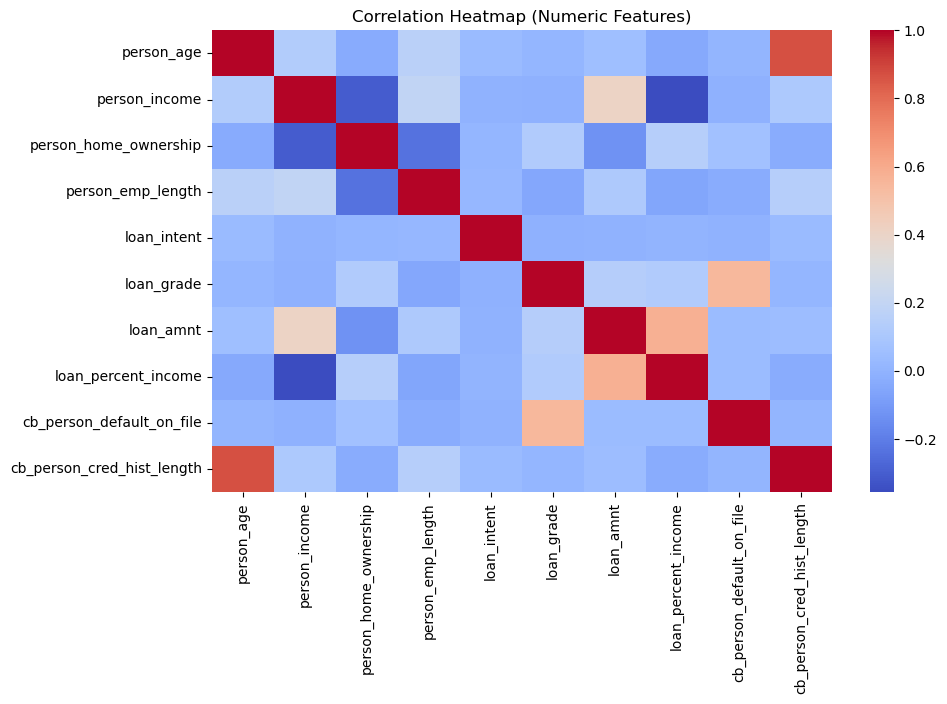

C:\Users\PRATHAM S\AppData\Local\Temp\ipykernel_1156\1230576159.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['loan_status'], y=df[col], palette="pastel")


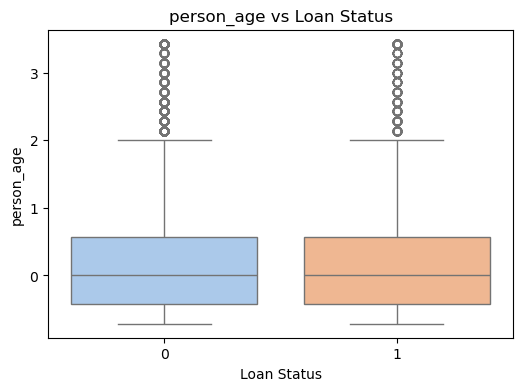

C:\Users\PRATHAM S\AppData\Local\Temp\ipykernel_1156\1230576159.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['loan_status'], y=df[col], palette="pastel")


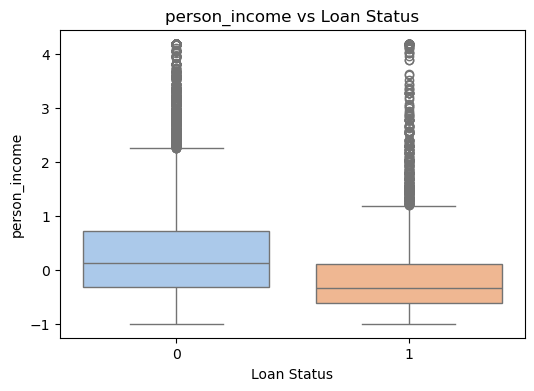

C:\Users\PRATHAM S\AppData\Local\Temp\ipykernel_1156\1230576159.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['loan_status'], y=df[col], palette="pastel")


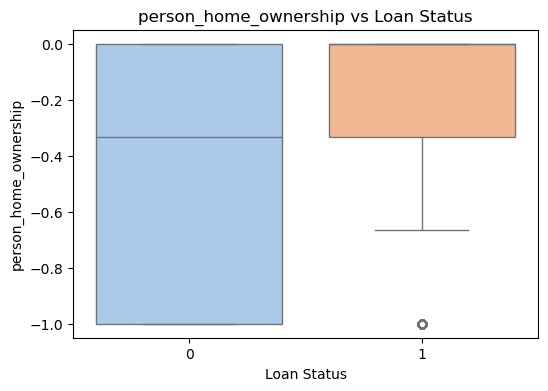

C:\Users\PRATHAM S\AppData\Local\Temp\ipykernel_1156\1230576159.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['loan_status'], y=df[col], palette="pastel")


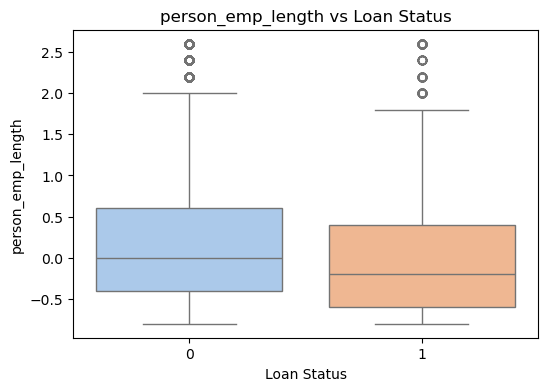

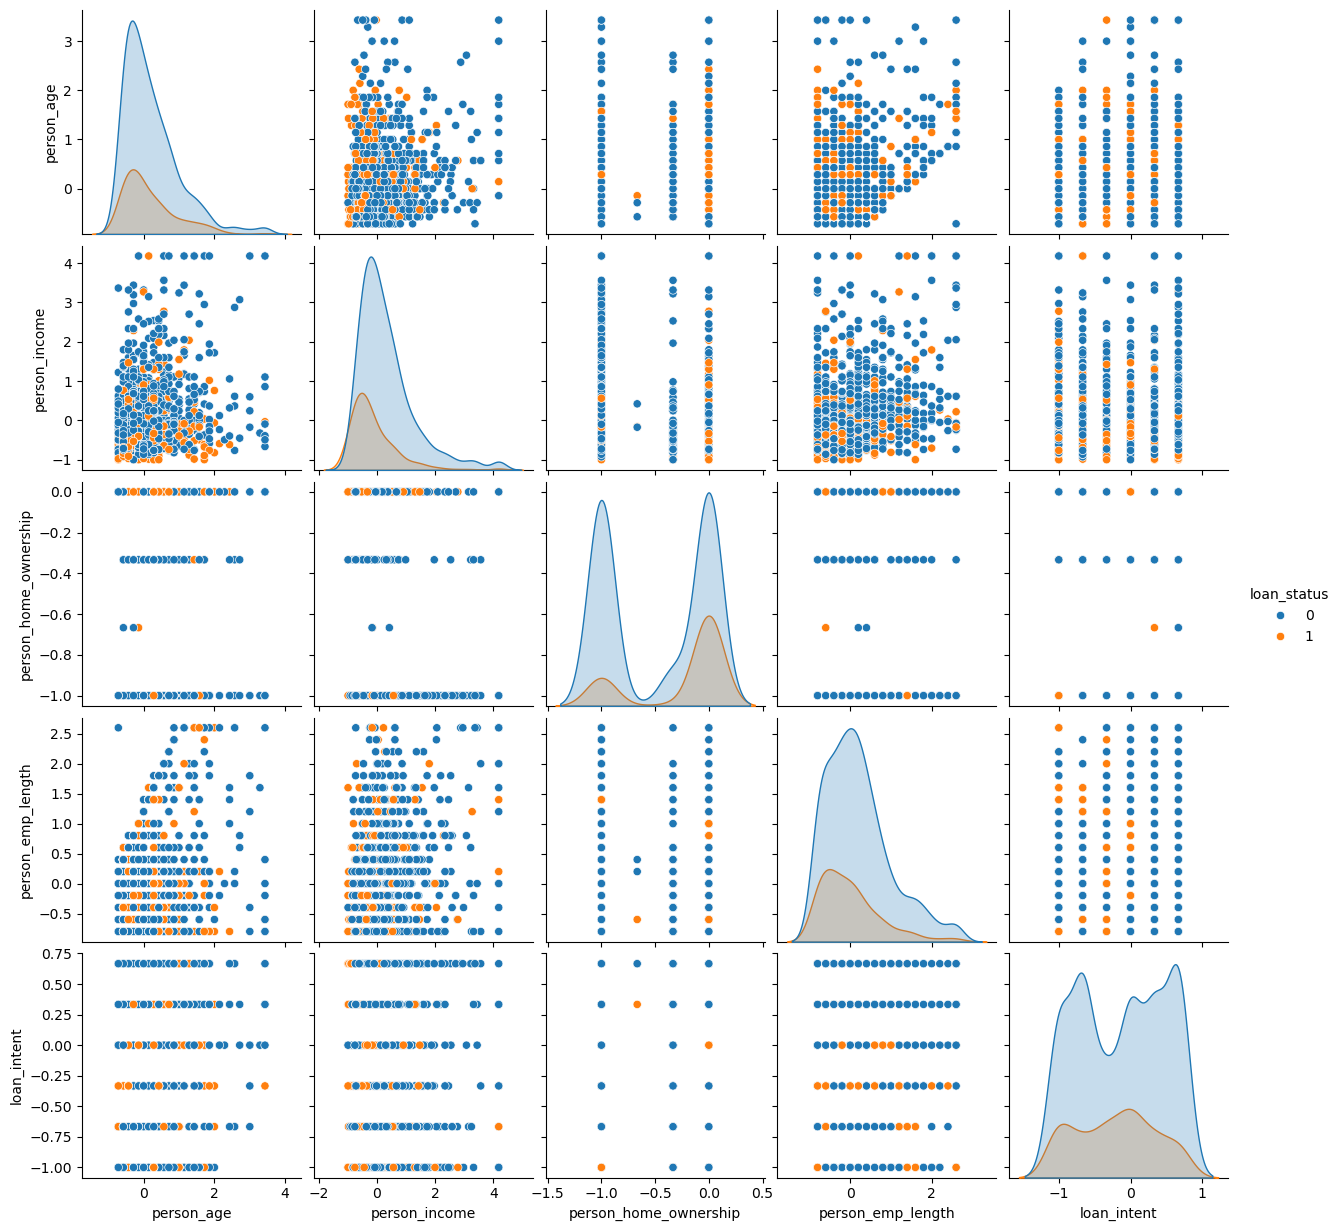

In [29]:
# -------------------------------
# Exploratory Data Analysis (EDA)
# -------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Basic Dataset Info
print("\nDataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

# 2. Target Variable (loan_status)
plt.figure(figsize=(6,4))
sns.countplot(x=df['loan_status'], palette="coolwarm")
plt.title("Loan Status Distribution")
plt.xlabel("Loan Status (0=Non-Default, 1=Default)")
plt.ylabel("Number of Applicants")
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width()/2., p.get_height(), str(int(p.get_height())), 
             ha='center', va='bottom')
plt.show()

# 3. Numeric Features Distribution
num_features = df.select_dtypes(include=[np.number]).columns.drop("loan_status", errors="ignore").tolist()
for col in num_features[:6]:   # show first 6 numerical features
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=30, kde=True, color="skyblue")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

# 4. Categorical Features Distribution
cat_features = df.select_dtypes(exclude=[np.number]).columns.tolist()
for col in cat_features[:6]:   # show first 6 categorical features
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col], palette="Set2")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    for p in plt.gca().patches:
        plt.text(p.get_x() + p.get_width()/2., p.get_height(), str(int(p.get_height())),
                 ha='center', va='bottom')
    plt.show()

# 5. Correlation Heatmap (Numerical Features)
plt.figure(figsize=(10,6))
corr = df[num_features].corr()
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

# 6. Relationship with Target (Loan Status)
for col in num_features[:4]:   # show first 4 numeric features
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df['loan_status'], y=df[col], palette="pastel")
    plt.title(f"{col} vs Loan Status")
    plt.xlabel("Loan Status")
    plt.ylabel(col)
    plt.show()

for col in cat_features[:4]:  
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col], hue=df['loan_status'], palette="Set1")
    plt.title(f"{col} vs Loan Status")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend(title="Loan Status", labels=["Non-Default","Default"])
    plt.show()

# 7. Pairplot (sampled to avoid heavy computation)
sample_df = df.sample(1000, random_state=42) if df.shape[0] > 1000 else df
# make sure loan_status is included
plot_features = num_features[:5] + ["loan_status"]
sns.pairplot(sample_df[plot_features], hue="loan_status", diag_kind="kde")
plt.show()


   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_status  loan_percent_income  \
0    PERSONAL          D      35000            1                 0.59   
1   EDUCATION          B       1000            0                 0.10   
2     MEDICAL          C       5500            1                 0.57   
3     MEDICAL          C      35000            1                 0.53   
4     MEDICAL          C      35000            1                 0.55   

  cb_person_default_on_file  cb_person_cred_hist_length  
0                         Y                           3  
1     

C:\Users\PRATHAM S\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


652/652 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8362 - auc_2: 0.8270 - loss: 0.3906 - val_accuracy: 0.8573 - val_auc_2: 0.8746 - val_loss: 0.3461
Epoch 2/20
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8572 - auc_2: 0.8602 - loss: 0.3513 - val_accuracy: 0.8655 - val_auc_2: 0.8833 - val_loss: 0.3309
Epoch 3/20
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8643 - auc_2: 0.8680 - loss: 0.3393 - val_accuracy: 0.8696 - val_auc_2: 0.8882 - val_loss: 0.3247
Epoch 4/20
652/652 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8675 - auc_2: 0.8732 - loss: 0.3306 - val_accuracy: 0.8761 - val_auc_2: 0.8937 - val_loss: 0.3181
Epoch 5/20
652/652 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8726 - auc_2: 0.8783 - loss: 0.3228 - val_accuracy: 0.8816 - val_auc_2: 0.8971 - val_loss: 0.3088
Epoch 6/20
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8760 - auc_2: 0.8810 - loss: 0.3173 - val_accuracy: 0.8811 - val_auc_2: 0.8979 - val_loss: 0.3059
Epoch 7/20
652/652 ━━━━━━━━

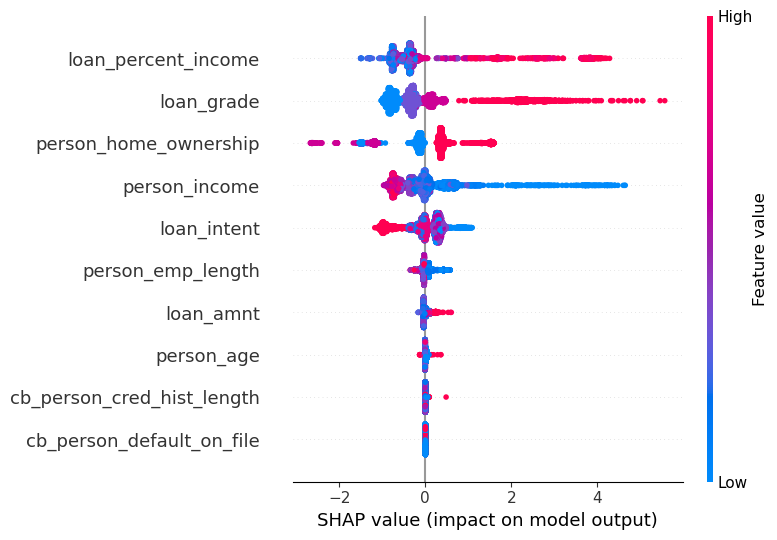

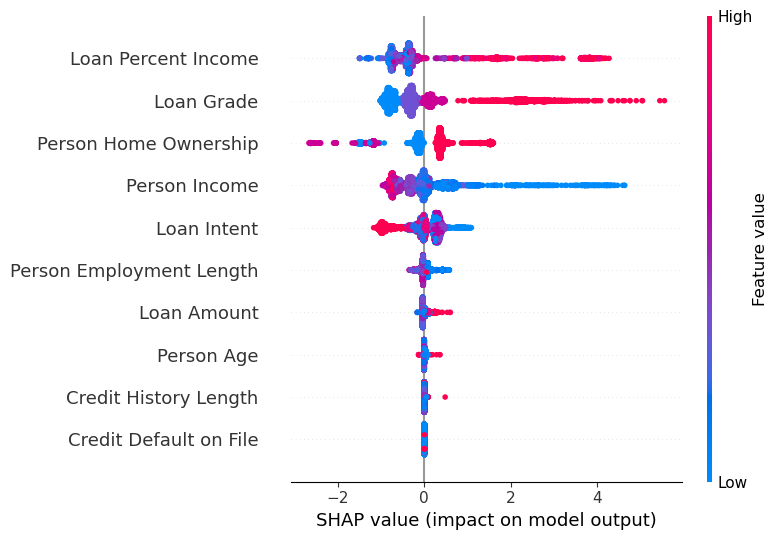

In [7]:
#step 2 Creating the model
import pandas as pd

df = pd.read_csv("Credit-Risk-Dataset.csv")  # replace with your dataset
print(df.head())
print(df.info())

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Handle missing values
df = df.fillna(df.median(numeric_only=True))

# Encode categorical features
cat_cols = df.select_dtypes(exclude=["number"]).columns
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

# Features and Target
X = df.drop("loan_status", axis=1)
y = df["loan_status"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

print("Logistic Regression Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, log_reg.predict_proba(X_test)[:,1]))

from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_test)

print("Gradient Boosting Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, gbm.predict_proba(X_test)[:,1]))

import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC()])
model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=32, verbose=1)

# Evaluate
dl_pred = (model.predict(X_test) > 0.5).astype("int32")
print("Deep Learning Report:\n", classification_report(y_test, dl_pred))

import shap
import pandas as pd

# If X_test is numpy array, convert to DataFrame
if not hasattr(X_test, "columns"):
    X_test = pd.DataFrame(X_test, columns=X.columns)  # reuse X's column names

# Create SHAP explainer
explainer = shap.Explainer(gbm, X_test)

# Calculate SHAP values
shap_values = explainer(X_test)

# ================================
# SHAP Summary Plot with Dataset Feature Names
# ================================
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

# ================================
# OR Custom Renamed Features
# ================================
custom_feature_names = [
    "Person Age",
    "Person Income",
    "Person Home Ownership",
    "Person Employment Length",
    "Loan Intent",
    "Loan Grade",
    "Loan Amount",
    "Loan Percent Income",
    "Credit Default on File",
    "Credit History Length"
]

shap.summary_plot(shap_values, X_test, feature_names=custom_feature_names)


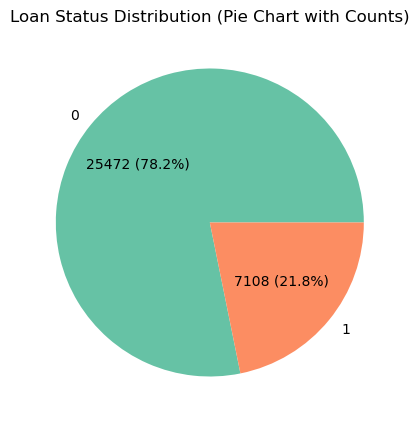

In [36]:
# Pie chart for loan_status with counts
plt.figure(figsize=(5,5))
counts = y.value_counts()
counts.plot.pie(autopct=lambda p: f'{int(p*sum(counts)/100)} ({p:.1f}%)',
                colors=sns.color_palette("Set2"))
plt.title("Loan Status Distribution (Pie Chart with Counts)")
plt.ylabel("")
plt.show()


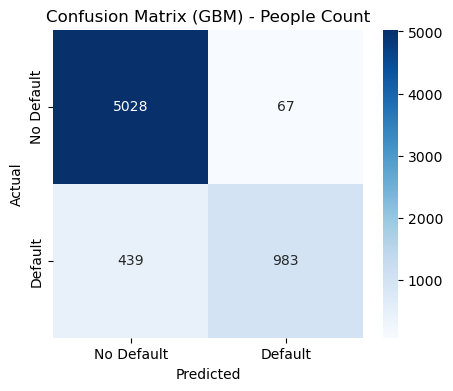

In [38]:
# ================================
# 3. Confusion Matrix Heatmap
# ================================
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["No Default","Default"], 
            yticklabels=["No Default","Default"])
plt.title("Confusion Matrix (GBM) - People Count")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


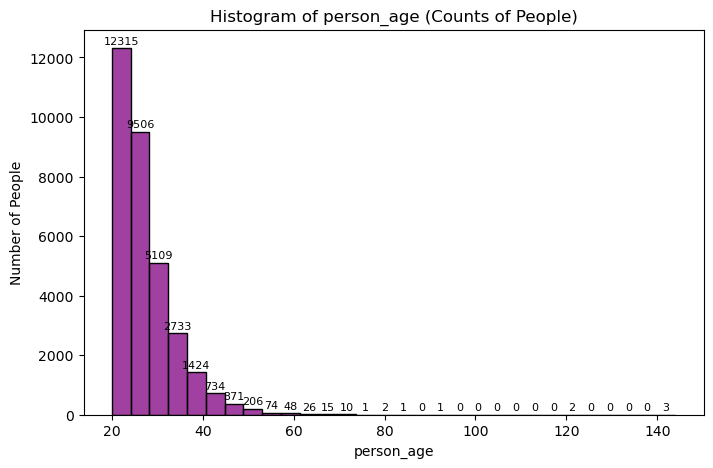

In [39]:

# ================================
# 4. Distribution of a Numeric Feature
# ================================
num_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(8,5))
ax = sns.histplot(df[num_cols[0]], bins=30, kde=False, color="purple")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')
plt.title(f"Histogram of {num_cols[0]} (Counts of People)")
plt.xlabel(num_cols[0])
plt.ylabel("Number of People")
plt.show()


C:\Users\PRATHAM S\AppData\Local\Temp\ipykernel_1156\238642201.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=df[num_cols[0]], palette="Set3")


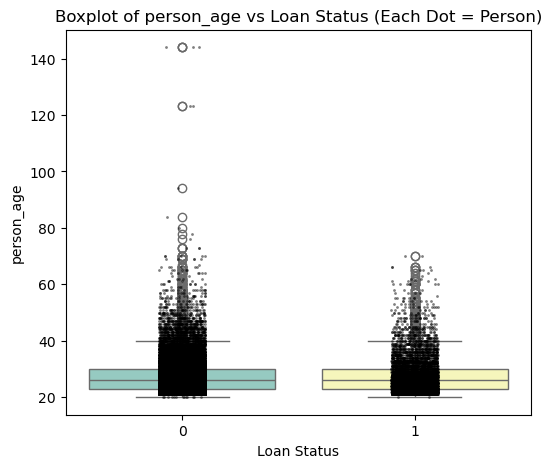

In [40]:
# ================================
# 5. Boxplot of Top Feature vs Loan Status
# ================================
plt.figure(figsize=(6,5))
sns.boxplot(x=y, y=df[num_cols[0]], palette="Set3")
sns.stripplot(x=y, y=df[num_cols[0]], color="black", size=2, alpha=0.5)  # adds people points
plt.title(f"Boxplot of {num_cols[0]} vs Loan Status (Each Dot = Person)")
plt.xlabel("Loan Status")
plt.ylabel(num_cols[0])
plt.show()


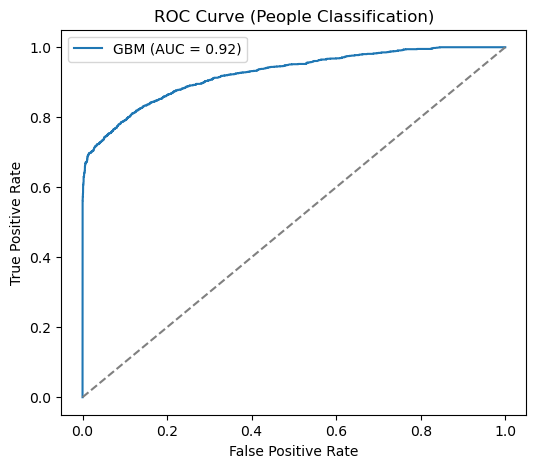

In [41]:
# ================================
# 6. ROC Curve
# ================================
from sklearn.metrics import roc_curve, auc

y_prob = gbm.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label="GBM (AUC = %.2f)" % auc(fpr,tpr))
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.title("ROC Curve (People Classification)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


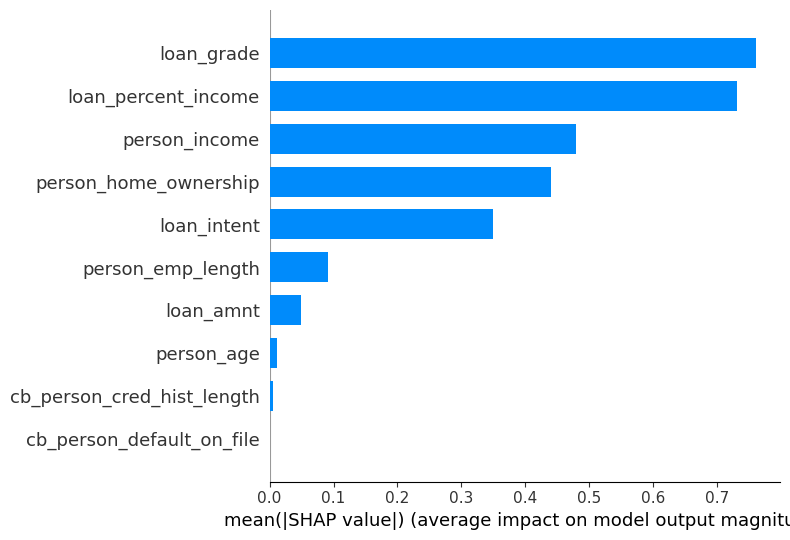

In [43]:
# ================================
# 7. SHAP Summary Plot (already included)
# ================================
import pandas as pd

# Example: rename your dataset columns
X_test = pd.DataFrame(X_test, columns=df.drop("loan_status", axis=1).columns)

# Suppose you want to rename
rename_map = {
    "feature1": "Person Age",
    "feature2": "Person Income",
    "feature3": "person_home_ownership",
    "feature4": "person_emp_length",
    "feature5": "loan_intent",
    "feature6": "loan_grade",
    "feature7": "loan_amnt",
    "feature8": "loan_status",
    "feature9": "loan_percent_income",
    "feature10": "cb_person_default_on_file",
    "feature11": "cb_person_cred_hist_length",
}

X_test = X_test.rename(columns=rename_map)

# SHAP summary plot with renamed features
shap.summary_plot(shap_values, X_test, plot_type="bar")


C:\Users\PRATHAM S\AppData\Local\Temp\ipykernel_17516\4045184780.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=y, palette="Set2")


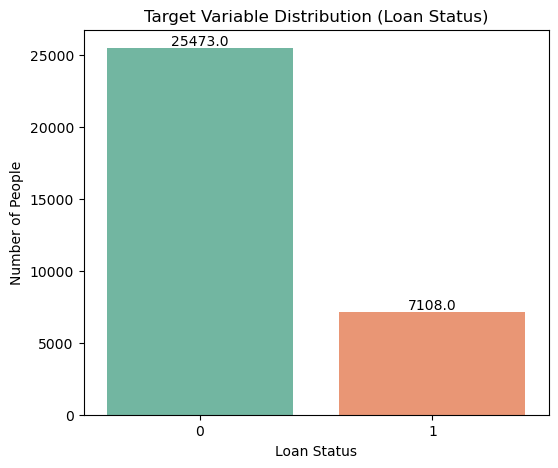

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ================================
# Load Dataset
# ================================
# Replace "your_dataset.csv" with your actual file
df = pd.read_csv("Credit-Risk-Dataset.csv")

# ================================
# Target Variable Distribution
# ================================
target_col = "loan_status"   # <-- change this if your target column name is different
y = df[target_col]

# Bar plot (counts with annotations)
plt.figure(figsize=(6,5))
ax = sns.countplot(x=y, palette="Set2")
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')
plt.title("Target Variable Distribution (Loan Status)")
plt.xlabel("Loan Status")
plt.ylabel("Number of People")
plt.show()

# Pie chart for loan_status with counts

